<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

# Exploring data

In [ ]:
#|code-fold: <show|true>
df = get_df("data/2_processed")
df['dimensions'] = df['file_path'].apply(lambda x: get_dims(x))
df['image_width'] = df['dimensions'].apply(lambda x: x[0] if x is not None else None)
df['image_height'] = df['dimensions'].apply(lambda x: x[1] if x is not None else None)
df['pixels'] = df['image_width'] * df['image_height']
# df['corrupt_status'] = df['file_path'].apply(lambda x: check_corrupted(x))
df

file_name      class  \
0        Marble_175.jpg     Marble   
1        Marble_443.png     Marble   
2        Marble_123.jpg     Marble   
3        Marble_287.jpg     Marble   
4        Marble_166.jpg     Marble   
...                 ...        ...   
3379  Limestone_462.jpg  Limestone   
3380  Limestone_416.jpg  Limestone   
3381  Limestone_191.jpg  Limestone   
3382  Limestone_504.jpg  Limestone   
3383  Limestone_134.jpg  Limestone   

                                         file_path  dimensions  image_width  \
0           data/2_processed/Marble/Marble_175.jpg  (408, 612)          408   
1           data/2_processed/Marble/Marble_443.png  (632, 474)          632   
2           data/2_processed/Marble/Marble_123.jpg  (219, 230)          219   
3           data/2_processed/Marble/Marble_287.jpg  (183, 275)          183   
4           data/2_processed/Marble/Marble_166.jpg  (160, 316)          160   
...                                            ...         ...          ...   
3379  data/2_processed/Limestone/Limestone_462.jpg  (168, 300)          168   
3380  data/2_processed/Limestone/Limestone_416.jpg  (232, 217)          232   
3381  data/2_processed/Limestone/Limestone_191.jpg  (409, 626)          409   
3382  data/2_processed/Limestone/Limestone_504.jpg  (189, 267)          189   
3383  data/2_processed/Limestone/Limestone_134.jpg  (408, 612)          408   

      image_height  pixels  
0              612  249696  
1              474  299568  
2              230   50370  
3              275   50325  
4              316   50560  
...            ...     ...  
3379           300   50400  
3380           217   50344  
3381           626  256034  
3382           267   50463  
3383           612  249696  

[3384 rows x 7 columns]

## File types

In [ ]:
#|code-fold: <show|true>
df['file_name'].apply(lambda x: x.split('.')[-1]).value_counts()

jpg     2959
png      398
jpeg      25
JPEG       2
Name: file_name, dtype: int64

## Corrupt file counts

In [ ]:
#|code-fold: <show|true>
df['corrupt_status'] = df['file_path'].apply(lambda x: check_corrupted(x))
df.corrupt_status.value_counts()

True    382
Name: corrupt_status, dtype: int64

## Corrupted file list

In [ ]:
#|code-fold: <show|true>
df[df['corrupt_status']==True]

NameError: name 'df' is not defined

In [ ]:
#|code-fold: <show|true>
import seaborn as sns

class_names = df['class'].value_counts().keys()
counts = df['class'].value_counts().values

count_df = pd.DataFrame(list(zip(class_names, counts)), columns=['class', 'count'])

sns.set_theme(style="darkgrid")
ax = sns.barplot(y='class', x='count', data=count_df)

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'df' is not defined

average width: nan and height: nan


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


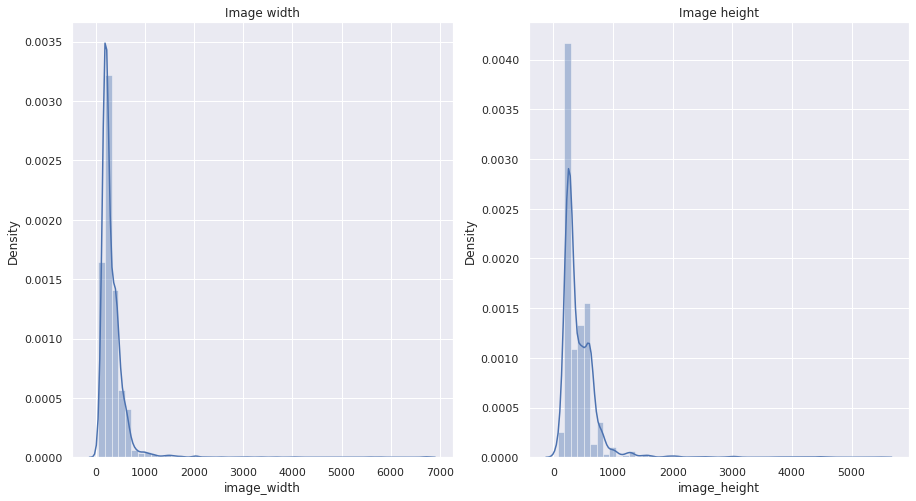

In [ ]:
#|code-fold: <show|true>
width_list = df.image_width
height_list = df.image_height
average_width = sum(width_list)/len(width_list)
average_height = sum(height_list)/len(height_list)

print('average width: {} and height: {}'.format(average_width, average_height))

fig, ax =plt.subplots(1,2, figsize=(15, 8))

sns.distplot(width_list, ax=ax[0])
ax[0].set_title('Image width')
sns.distplot(height_list, ax=ax[1])
ax[1].set_title('Image height')
fig.show()

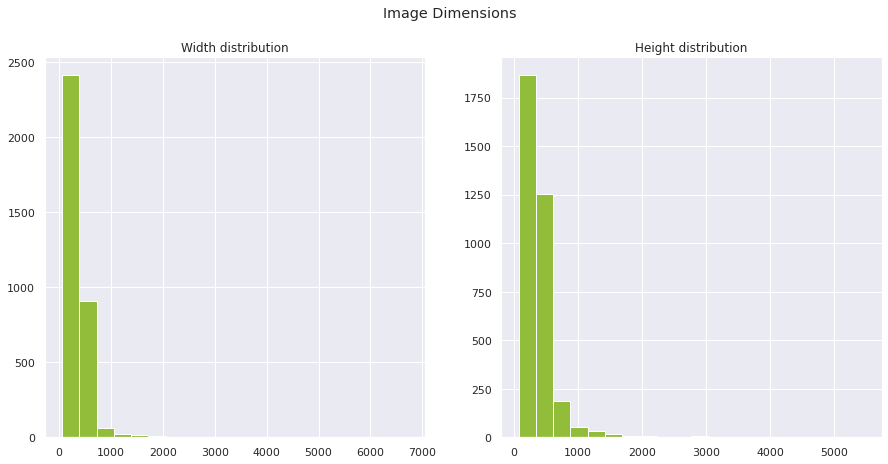

In [ ]:
#|code-fold: <show|true>
# plot histograms to show the distribution of width and height values
fig, axs = plt.subplots(1,2, figsize=(15,7))
axs[0].hist(df.image_width.values, bins=20, color = '#91bd3a')
axs[0].set_title('Width distribution')
# axs[0].set_xlim(1000, 3000)

axs[1].hist(df.image_height.values, bins=20, color = '#91bd3a')
axs[1].set_title('Height distribution')
# axs[1].set_xlim(1000, 3000)

plt.suptitle('Image Dimensions')
plt.show()

## Sample counts

### Training set counts

In [ ]:
#|code-fold: <show|true>
get_df("data/4_tfds_dataset/train")['class'].value_counts()

Quartzite    492
Limestone    438
Marble       431
Coal         385
Sandstone    370
Granite      254
Basalt       211
Name: class, dtype: int64

### Validation set counts

In [ ]:
#|code-fold: <show|true>
get_df("data/4_tfds_dataset/val")['class'].value_counts()

Quartzite    82
Limestone    73
Marble       71
Coal         64
Sandstone    61
Granite      42
Basalt       35
Name: class, dtype: int64

### Test set counts

In [ ]:
#|code-fold: <show|true>
get_df("data/4_tfds_dataset/test")['class'].value_counts()

Quartzite    82
Marble       73
Limestone    73
Coal         65
Sandstone    63
Granite      43
Basalt       36
Name: class, dtype: int64

# Data Augmentation

## Sample Images

INFO:absl:Constructing tf.data.Dataset image_folder for split train, from data/4_tfds_dataset


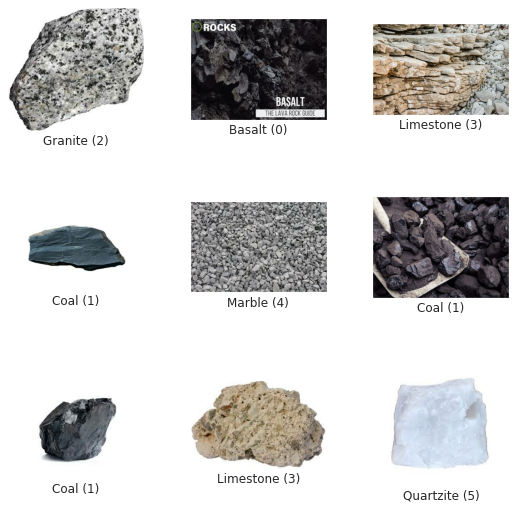

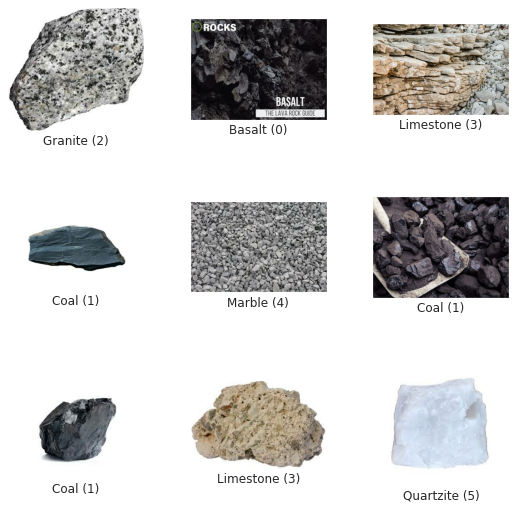

In [ ]:
#|code-fold: <show|true>
ds = builder.as_dataset(split='train', shuffle_files=True)
tfds.show_examples(ds, builder.info)

### Samples before Augmentation

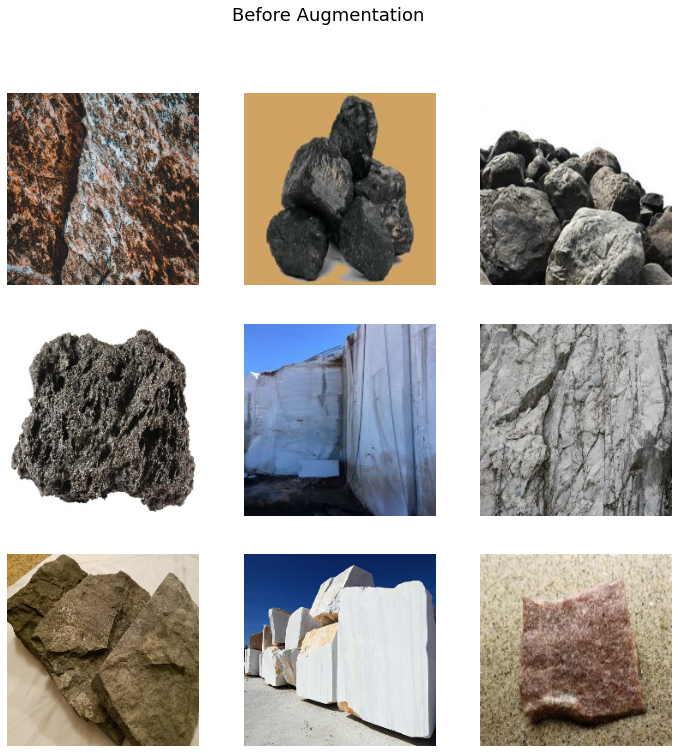

In [ ]:
#|code-fold: <show|true>
train_dataset = load_dataset()
visualize_dataset(train_dataset, title="Before Augmentation")

### Samples after RandAugment

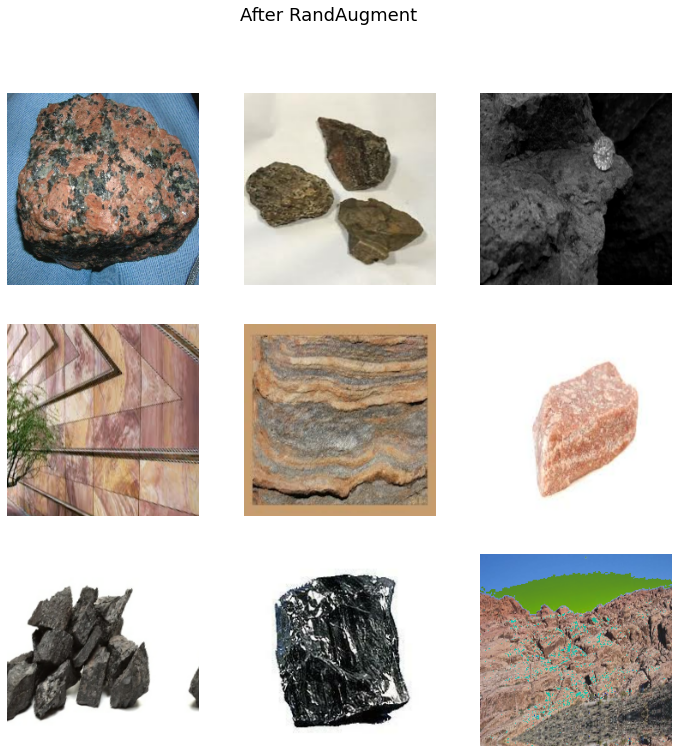

In [ ]:
#|code-fold: <show|true>
train_dataset = load_dataset().map(apply_rand_augment, num_parallel_calls=AUTOTUNE)
visualize_dataset(train_dataset, title="After RandAugment")

### Samples after cutmix and mixup augmentation

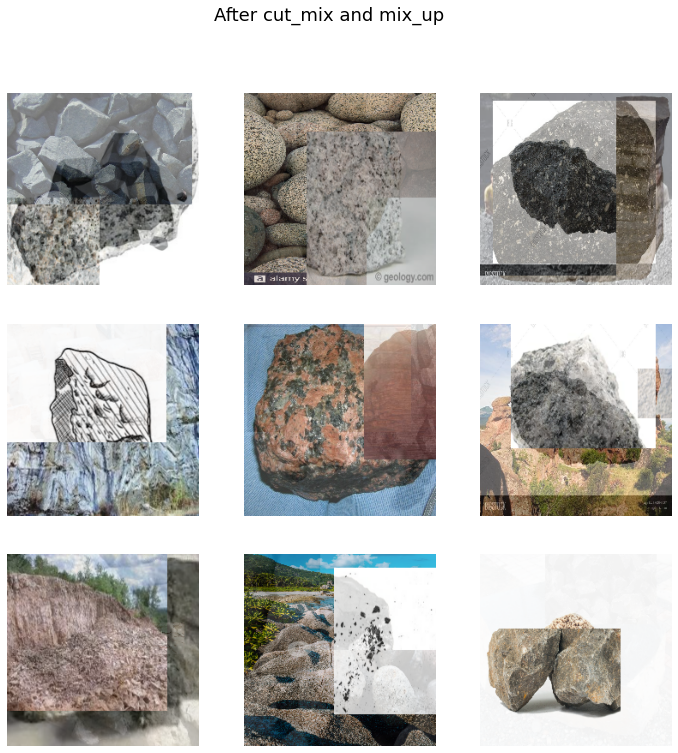

In [ ]:
#|code-fold: <show|true>
train_dataset = load_dataset().map(cut_mix_and_mix_up, num_parallel_calls=AUTOTUNE)
visualize_dataset(train_dataset, title="After cut_mix and mix_up")